# General Assembly Modeling Challenge (Megna Murali)

# PART 1

In [247]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

## Load in the data file and header file provided

In [248]:
# import the cancer dataset
breast_cancer = pd.read_csv('../data/breast-cancer.csv', header = None)

In [249]:
# import the header file
my_file = open("../data/field_names.txt", "r")
  
# reading the file
data = my_file.read()
  
field_names = data.split("\n")
# print(field_names), print(len(field_names))
my_file.close()

In [250]:
# add headers to the cancer dataset
breast_cancer.columns = field_names
# breast_cancer

### Evaluate the dataset

In [251]:
# Check the dataset for inconsistencies such as missing or null values
# Check shape of data
# Look for outliers
# We have identified that ID can be dropped and diagnosis is the dependent variable, it will need to be encoded

In [252]:
# Examine the data
breast_cancer.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [253]:
# Examine the data
breast_cancer.tail()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [254]:
# Check dimensions
print("Breast Cancer dataset dimensions : {}".format(breast_cancer.shape))

Breast Cancer dataset dimensions : (569, 32)


In [255]:
# Look for missing or null values
print(breast_cancer.isnull().sum(), breast_cancer.isna().sum())
# there are no missing or null values

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

In [256]:
#Count diagnosis 
breast_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [257]:
breast_cancer.info()
# we can drop ID and we need to encode diagnosis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          569 non-null    int64  
 1   diagnosis                   569 non-null    object 
 2   radius_mean                 569 non-null    float64
 3   radius_sd_error             569 non-null    float64
 4   radius_worst                569 non-null    float64
 5   texture_mean                569 non-null    float64
 6   texture_sd_error            569 non-null    float64
 7   texture_worst               569 non-null    float64
 8   perimeter_mean              569 non-null    float64
 9   perimeter_sd_error          569 non-null    float64
 10  perimeter_worst             569 non-null    float64
 11  area_mean                   569 non-null    float64
 12  area_sd_error               569 non-null    float64
 13  area_worst                  569 non

In [258]:
breast_cancer.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [259]:
# plot histograms - not completed 

###  Mean and median smoothness and compactness for benign and malignant tumors

In [260]:
# Q: Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? 
# Q: Explain how you would identify this.

In [261]:
# It was unclear what was required with this question
# We have evaluated the mean and median of the _mean features only to observe any differences
# Further feature analysis is conducted in the next sections

In [262]:
breast_cancer.groupby(['diagnosis'], as_index=False)['smoothness_mean'].mean()
# Malignant tumors are smoother than benign tumors

,diagnosis,smoothness_mean
0,B,2.000321
1,M,4.323929


In [263]:
breast_cancer.groupby(['diagnosis'], as_index=False)['smoothness_mean'].median()
# Median of smoothness_mean is fairly close to mean for benign tumors indicating a close to symmetric distribution
# Median of smoothness_mean is less than mean for malignant tumors indicating negatively skewed distribution

,diagnosis,smoothness_mean
0,B,1.8510
1,M,3.6795


In [264]:
breast_cancer.groupby(['diagnosis'], as_index=False)['compactness_mean'].mean()
# Malignant tumors are more compact than benign tumors

,diagnosis,compactness_mean
0,B,0.021438
1,M,0.032281


In [265]:
breast_cancer.groupby(['diagnosis'], as_index=False)['compactness_mean'].median()
# both are -vely skewed

,diagnosis,compactness_mean
0,B,0.01631
1,M,0.02859


### Bootstrap samples

In [266]:
# Q: Write a function to generate bootstrap samples of the data.

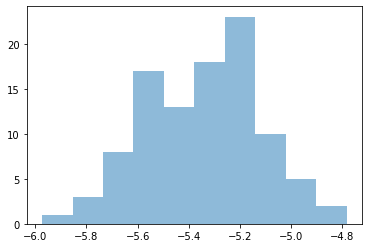

In [267]:
# This function creates samples for any given data frame and feature
# Sample is split by diagnoses
# It then plots the difference in means

def bootstrap(df,n_sample, feature_name):
    
    mean_diff = []

    for i in range(n_sample):
        sample = df.sample(frac=1.0, replace=True)
        B_sample = sample[sample.diagnosis == 'B']
        B_sample_mean = B_sample[feature_name].mean()
        
        M_sample = sample[sample.diagnosis == 'M']
        M_sample_mean = M_sample[feature_name].mean()

        mean_diff.append(B_sample_mean - M_sample_mean)

    mean_diff = pd.Series(mean_diff)
    plt.hist(mean_diff, alpha=.5)


# call function by specifying data frame, sample number and feature 
# radius_mean appears to be significantly different between diagnosis types
bootstrap(breast_cancer,100,'radius_mean')

## Exploratory Analysis

In [268]:
# Q: Identify 2-3 variables that are predictive of a malignant tumor.
# Q: Display the relationship visually and write 1-2 sentences explaining the relationship.

In [269]:
# first prepare the dataset and split into features and dependent variable

# set dependent variable
y = breast_cancer.diagnosis    

# create features dataset
list = ['ID','diagnosis']
features = breast_cancer.drop(list,axis = 1,inplace = False)

# remove ID
list = ['ID']
breast_cancer.drop(list, axis = 1, inplace = True)


In [270]:
# Check for outliers 
# Not completed here due to lack of time, see box plots below

<AxesSubplot:>

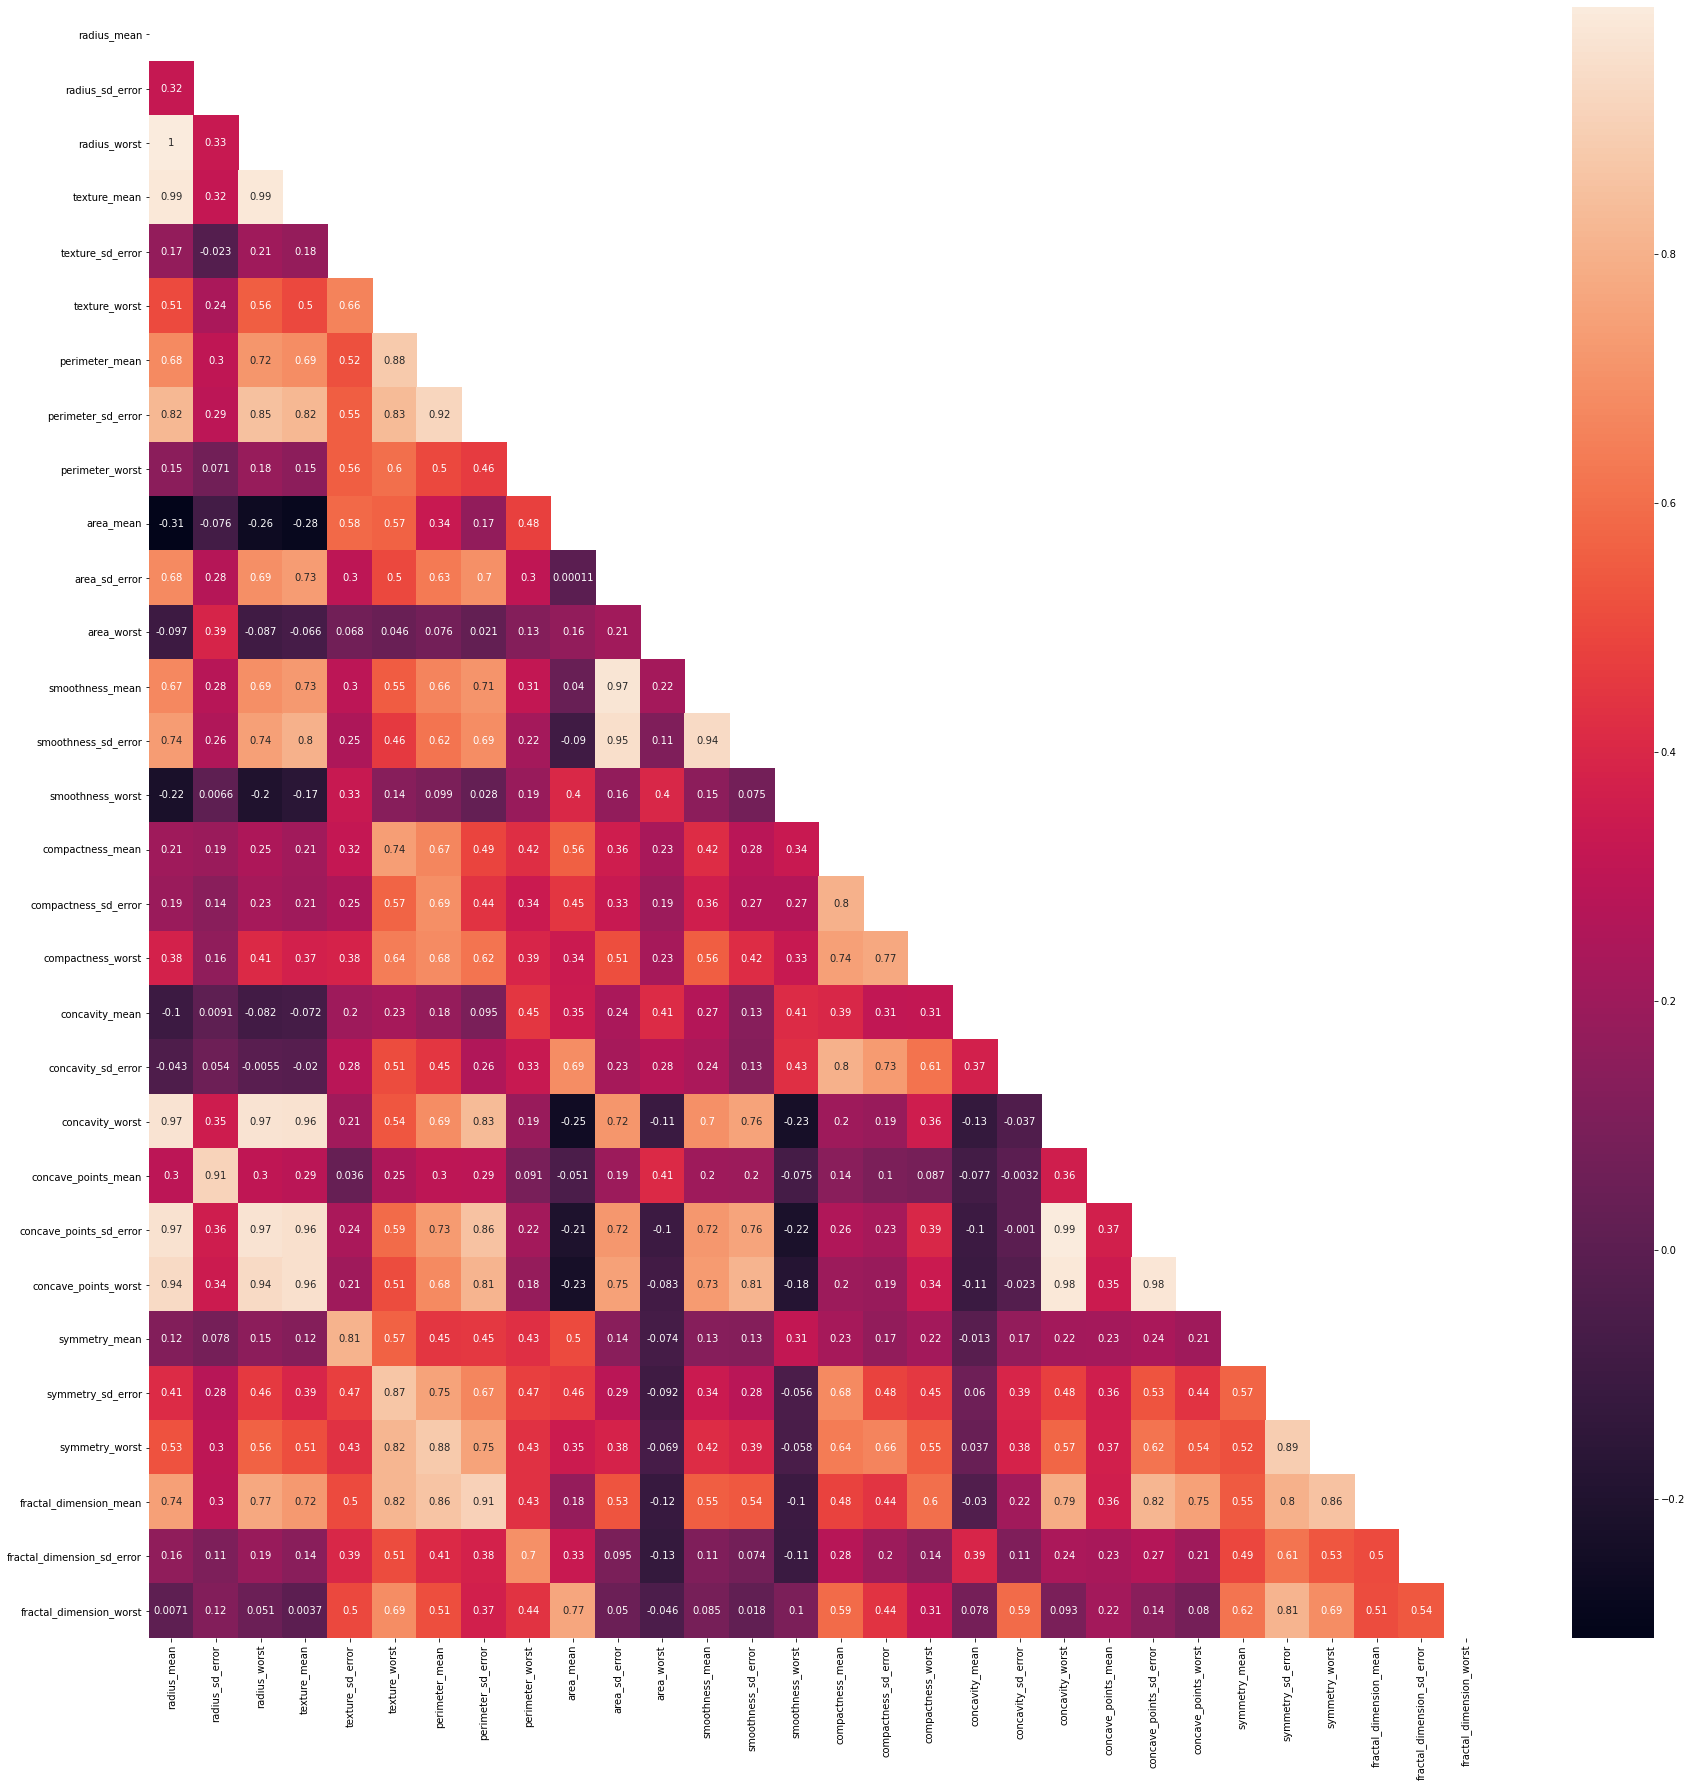

In [272]:
# Method 1: Correlation matrix
# Use matrix to check if any features are highl correlated
# We can see that several features are highly correlated

# Heatmap
plt.subplots(figsize=(30,30))
matrix = np.triu(features.corr())
sns.heatmap(features.corr(), annot=True,mask=matrix)


In [274]:
# Find high and low correlated features
# create the correlation matrix
corr_matrix = features.corr().abs()

# Select upper triangle of correlation matrix
corr_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find feature columns with correlation greater than 0.8
high_corr = [column for column in corr_upper.columns if any(corr_upper[column] > 0.8)]
print("highly correlated features \n",high_corr)
print ("\n")

# Find feature columns with correlation <0.4
low_corr = [column for column in corr_upper.columns if any(corr_upper[column] <0.4)]
print("low correlated features \n",low_corr)

highly correlated features 
 ['radius_worst', 'texture_mean', 'perimeter_mean', 'perimeter_sd_error', 'smoothness_mean', 'smoothness_sd_error', 'compactness_sd_error', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_worst']


low correlated features 
 ['radius_sd_error', 'radius_worst', 'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimensi

In [275]:
# Here we choose to remove half the highly correlated features
# This is a quick way to reduce features however there is a risk that we have removed some important features
# Given enough time we would revisit this step with different methods to evaluate features

# Select upper triangle of correlation matrix
corr_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find feature columns with correlation greater than 0.8
high_corr = [column for column in corr_upper.columns if any(corr_upper[column] > 0.8)]

# Drop features 
features = features.drop(features[high_corr], axis=1)
features.columns

Index(['radius_mean', 'radius_sd_error', 'texture_sd_error', 'texture_worst',
       'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst',
       'smoothness_worst', 'compactness_mean', 'compactness_worst',
       'concavity_mean', 'fractal_dimension_sd_error'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'radius_sd_error'),
  Text(2, 0, 'texture_sd_error'),
  Text(3, 0, 'texture_worst'),
  Text(4, 0, 'perimeter_worst'),
  Text(5, 0, 'area_mean'),
  Text(6, 0, 'area_sd_error'),
  Text(7, 0, 'area_worst'),
  Text(8, 0, 'smoothness_worst'),
  Text(9, 0, 'compactness_mean'),
  Text(10, 0, 'compactness_worst'),
  Text(11, 0, 'concavity_mean'),
  Text(12, 0, 'fractal_dimension_sd_error')])

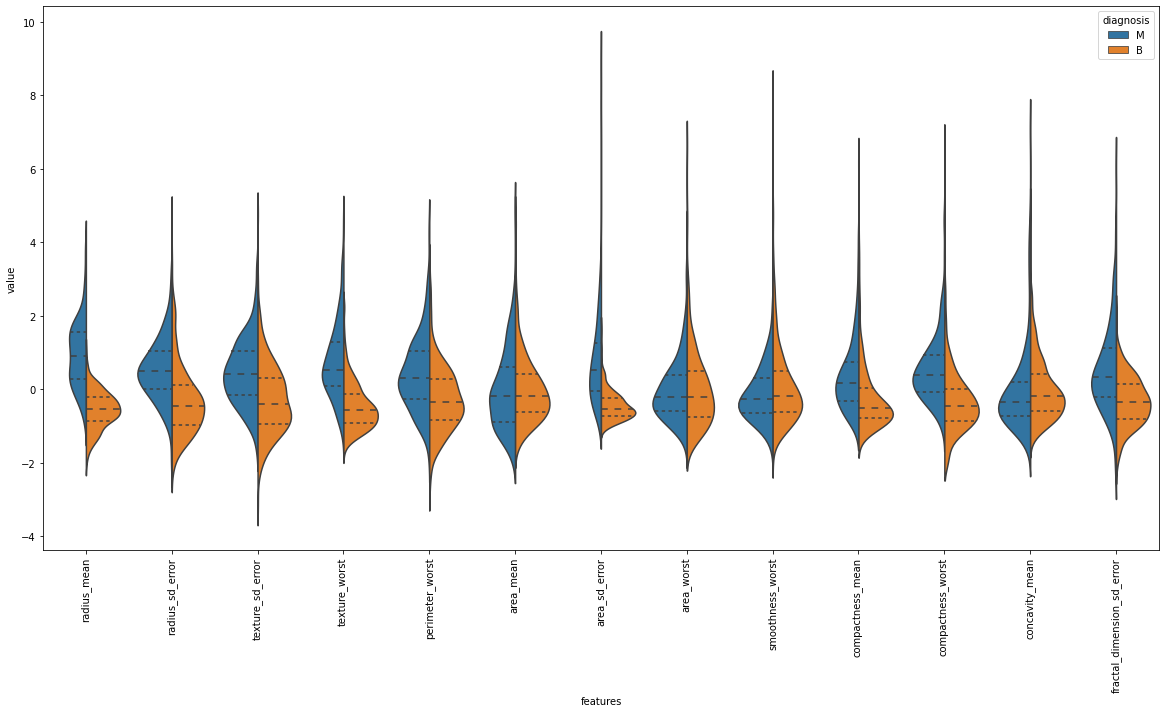

In [276]:
# Step 2: Look at violin plots to check differences in features between dependent variables

# first standardise features
data = features
data_std = (data - data.mean()) / (data.std()) # standardization


data = pd.concat([y,data_std],axis=1)
data = pd.melt(data,id_vars="diagnosis",
 var_name="features",
 value_name='value')

# make a violin plot
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

# radius_mean, radius_sd_error, texture_worst, compactness_worst are the most distinct

<AxesSubplot:xlabel='value', ylabel='features'>

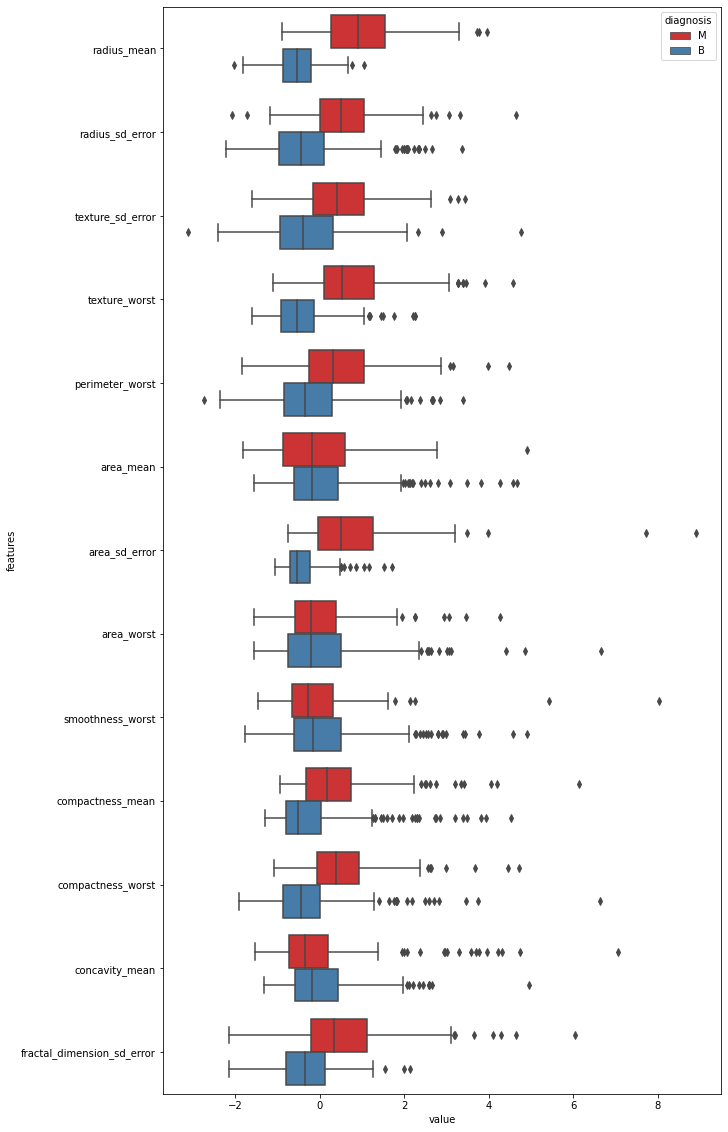

In [277]:
# Step 3: check box plots of features
plt.figure(figsize=(10,20))
# sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", hue="diagnosis", data=data, palette='Set1')
# plt.legend(loc='best');

In [278]:
# It appears that radius_mean, texture_worst, compactness_worst are good features to use

In [279]:
# Check further with a ttest
ttest_df = pd.DataFrame(data=breast_cancer[['texture_worst', 'diagnosis']])
ttest_df = ttest_df.set_index('diagnosis')
stats.ttest_ind(ttest_df.loc['M'], ttest_df.loc['B'])

# texture_worst has a significant difference between B and M 

Ttest_indResult(statistic=array([17.69839198]), pvalue=array([3.93826311e-56]))

In [280]:
# Check further with a ttest
ttest_df = pd.DataFrame(data=breast_cancer[['radius_mean', 'diagnosis']])
ttest_df = ttest_df.set_index('diagnosis')
stats.ttest_ind(ttest_df.loc['M'], ttest_df.loc['B'])

# radius_mean has a significant difference between B and M 

Ttest_indResult(statistic=array([25.43582161]), pvalue=array([8.46594057e-96]))

In [281]:
# Check further with a ttest
ttest_df = pd.DataFrame(data=breast_cancer[['compactness_worst', 'diagnosis']])
ttest_df = ttest_df.set_index('diagnosis')
stats.ttest_ind(ttest_df.loc['M'], ttest_df.loc['B'])

# compactness_worst has a significant difference between B and M 

Ttest_indResult(statistic=array([10.64249782]), pvalue=array([3.07230877e-24]))

In [282]:
# Check further with a ttest
ttest_df = pd.DataFrame(data=breast_cancer[['area_mean', 'diagnosis']])
ttest_df = ttest_df.set_index('diagnosis')
stats.ttest_ind(ttest_df.loc['M'], ttest_df.loc['B'])

# area_mean does not have a significant difference between B and M 

Ttest_indResult(statistic=array([-0.30571113]), pvalue=array([0.7599368]))

In [283]:
# Q: Display the relationship visually and write 1-2 sentences explaining the relationship.

In [284]:
# The mean for these three features appears significantly different for the two diagnosis types
# There is however an overlap between the groups with M tumors having a higher IQR

Text(0.5, 1.0, 'Graph of texture_worst vs diagnosis of tumor')

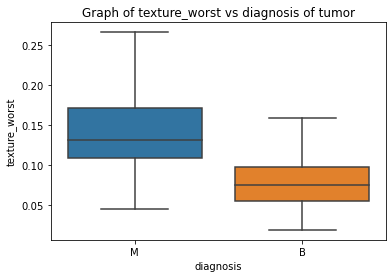

In [285]:
# create boxplots for texture mean vs diagnosis of tumor
plot = sns.boxplot(x='diagnosis', y='texture_worst', data=breast_cancer, showfliers=False)
plot.set_title("Graph of texture_worst vs diagnosis of tumor")

Text(0.5, 1.0, 'Graph of radius_mean vs diagnosis of tumor')

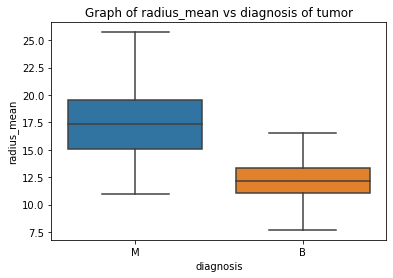

In [286]:
# create boxplots for texture mean vs diagnosis of tumor
plot = sns.boxplot(x='diagnosis', y='radius_mean', data=breast_cancer, showfliers=False)
plot.set_title("Graph of radius_mean vs diagnosis of tumor")

Text(0.5, 1.0, 'Graph of compactness_worst vs diagnosis of tumor')

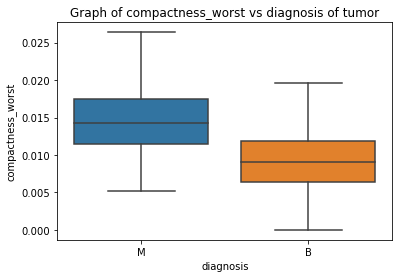

In [287]:
# create boxplots for texture mean vs diagnosis of tumor
plot = sns.boxplot(x='diagnosis', y='compactness_worst', data=breast_cancer, showfliers=False)
plot.set_title("Graph of compactness_worst vs diagnosis of tumor")

## Modeling

In [288]:
# Q: Build a model to predict the malignant tumors.

In [289]:
#Encoding categorical variable
labelencoder_y = LabelEncoder()
y= labelencoder_y.fit_transform(y)
# print(labelencoder_y.fit_transform(y))

In [290]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.20, stratify=y, random_state = 1)

In [291]:
#Feature Scaling
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [292]:
# Q: Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.

In [293]:
# Comparing Logistic Regression vs Decision Trees
# LOG REG is primarily estimating the probability of an outcome, it assumes the data can be seprated linearly
# It is more suited to continuous data and is more impacted by outliers and missing values
# We have chosen to use it here to compare results to the DT model

# Decision Trees do not assume linearity so can be better suited to complex data sets that maybe highly skewed 
# DTs cope better with outlines and missing values

In [294]:
# Q: Evaluate the performance of each model

Model[LOG REG] Training Accuracy: 0.9648351648351648
Model[LOG REG] Testing Accuracy =  0.9649122807017544


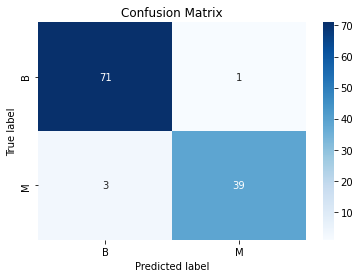

In [295]:
# Logistic Regression
log = LogisticRegression(random_state = 0)
model=log.fit(X_train, y_train)
print('Model[LOG REG] Training Accuracy:', log.score(X_train, y_train))

cm = confusion_matrix(y_test, log.fit(X_train, y_train).predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
 

print('Model[LOG REG] Testing Accuracy = ',(TP + TN) / (TP + TN + FN + FP))

sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

# This model is quite accurate with only 3 M results incorrectly classified as B

In [296]:
# Most important co-efs
importances_lr = pd.DataFrame(data={
    'Attribute': features.columns,
    'Importance': model.coef_[0]
})
importances_lr = importances_lr.sort_values(by='Importance', ascending=False)
importances_lr

# radius_mean,fractal_dimension_sd_error and area_sd_error are the most important coefs

,Attribute,Importance
0,radius_mean,2.655602
12,fractal_dimension_sd_error,2.283925
6,area_sd_error,1.874790
1,radius_sd_error,1.491608
3,texture_worst,1.196029
2,texture_sd_error,0.807306
10,compactness_worst,0.567903
8,smoothness_worst,0.260155
7,area_worst,-0.031410
5,area_mean,-0.445398


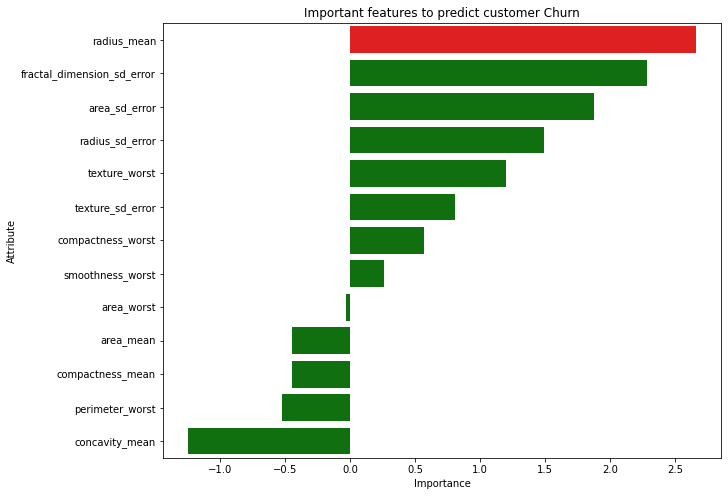

In [297]:
# Plot coefs by importance
values = importances_lr.Importance    
idx = importances_lr.Attribute
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
plt.show()

In [298]:
# Additional step to tune the model to see if we can improve results
# Unable to complete due to lack of time

In [299]:
# Q: Evaluate the performance of each model

[Model[DECISION TREE] Training Accuracy: 1.0
Model[DECISION TREE] Testing Accuracy =  0.9649122807017544


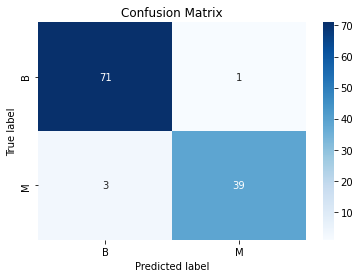

In [300]:
#Using DecisionTreeClassifier 
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model =tree.fit(X_train, y_train)
print('[Model[DECISION TREE] Training Accuracy:', tree.score(X_train, y_train))

cm = confusion_matrix(y_test, log.fit(X_train, y_train).predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
 
print('Model[DECISION TREE] Testing Accuracy = ',(TP + TN) / (TP + TN + FN + FP))

sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");
# This model is quite accurate with only 3 M results incorrectly classified as B

In [301]:
# Most important co-efs

importances_dt = pd.DataFrame(data={
    'Attribute': features.columns,
    'Importance': model.feature_importances_
})
importances_dt = importances_dt.sort_values(by='Importance', ascending=False)
importances_dt
#
# radius_mean,fractal_dimension_sd_error are the top 2 - same as log reg
# however area_sd_error is not as important (#3 in log reg)
# radius_sd_error is the third most important

,Attribute,Importance
0,radius_mean,0.535115
12,fractal_dimension_sd_error,0.143376
1,radius_sd_error,0.122790
2,texture_sd_error,0.056853
3,texture_worst,0.055429
9,compactness_mean,0.026442
11,concavity_mean,0.020284
6,area_sd_error,0.014123
4,perimeter_worst,0.012844
7,area_worst,0.012744


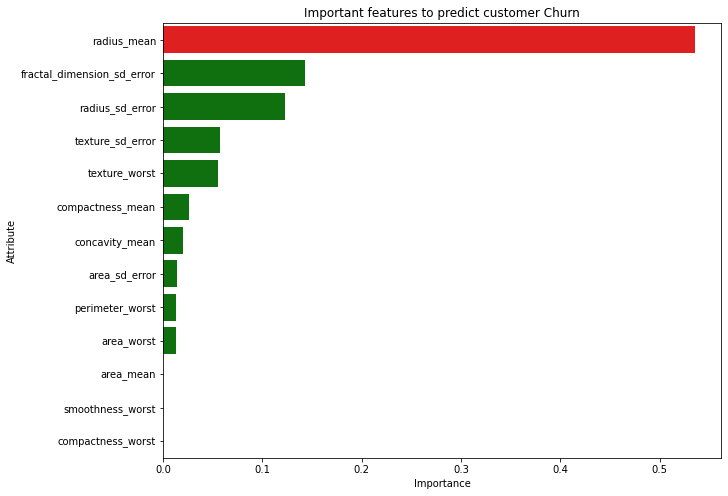

In [302]:
values = importances_dt.Importance    
idx = importances_dt.Attribute
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
plt.show()

In [ ]:
# Q:Identify how you would control for overfitting in each classification technique.

In [ ]:
# Comparing test and training accuracy in LOG REG look similar
# Removing features - we did this when checking correlation however this has the risk of removing potentially significant features
# An alternate approach would be to use principal components analysis to find the best features
# We would also consider tuning models, utilising regularisation
# We were also unable to identifying and handle any outliers, this should also be incorporated

In [ ]:
# Q: In each model, identify the most important predictive variables and explain how you identified them

In [ ]:
# As seen above we eliminated features that are highly correlated then used violin and box plots to visualise feature distribution
# Then we used t-test to check if the difference is significant and finally we checked coefficient importances within each model
# In the LOG REG model, radius_mean,fractal_dimension_sd_error and area_sd_error were the most important
# In the decision tree model, radius_mean,fractal_dimension_sd_error and radius_sd_error were the most important


In [ ]:
# Q: Explanation To Technical Audiences
# Explain the limitations of your analysis and identify possible further steps you could take.

In [ ]:
# This is a fairly high level analysis to test approaches and get familiar with the data
# To improve the analysis we would 
# Do more exploratory analysis such as histograms and outliers, this was not done due to lack of time
# We would also use more robust ways of elminiating features such as PCA
# As the dataset is fairly small, overfitting is a risk so we would spend more time on model tuning and fitting using technicques such as hyper parameter tuning and regularisation
# We would also like to test this model on a larger dataset to ensure that we are comfortable with the degree of accuracy

In [ ]:
# Q: To Non-Technical Audiences
# Write a short summary of your analysis, explaining how your model works and how it performs.
# Briefly explain the factors that contributed to malignant vs benign tumor identification.

In [ ]:
# We have built a model that uses tumor characteristics to identify whether a tumor is malignant or benign
# To build this model we used a dataset of 500+ known and identified tumors
# We evaluated the data and identified that although there are many features to a tumor there are a few tumor characteristics that are distinctive between benign and malignant tumors
# We processed the data to eliminate any tumor characteristics that do not help to differentiate between benign and malignant 
# We then used machine learning models to predict diagnosis based on the most significant tumor characteristics
# The models we built are over 95% accurate at identifying malignant tumors correctly

# PART 2

In [ ]:
# Code
# Feel free to comment on style, library usage, or other improvements.
# Methodology
# Feel free to comment on the student's data setup, modeling methodology, and model evaluation.
# Conceptual Understanding
# Finally, feel free to add any suggestions or takeaways on how the student could continue to improve their understanding of these concepts.

In [ ]:
# Sample 1

# Code:
# Student should use consistent naming conventions and variable names should be distinct
# Using d as a variable name is not advised; data is used as a variable but is not defined anywhere, appears to be an error
# x1 and x2 are not usually used, more conventional to use X and y
# Import statements should be grouped at the top of the code and should not repeat
# Unused libraries should not be imported such as train_test_split
# Student has not specified what data to fit the model i.e. .fit(x,y)

# Methodology
# Student has not explored features to find the most suitable ones for the model
# Student has not checked for null or blank values in the dataset 
# Student has not checked for outliers
# Student has not applied any scaling
# Student is only using one feature to predict
# Student has used Contract Type as the independent variable in the model when this is not fully populated in the dataset
# Train test split has not been applied

# Conceptual understanding
# Student needs to understand that feature enginnering is essential BEFORE building the model
# Student needs to specify why they have used a linear regression model
# Categorical variables cannot be directly used in linear regression model, although encoding has been applied, this method needs more consideration
# Student also needs to consider how to evaluate the model success

In [ ]:
# Sample 2

# Code:
# Student has used consistent naming convention
# Student has imported all libraries at the start which is good
# Student has not specified what data to fit the model i.e. .fit(x,y)

# Methodology
# Student has not explored features to find the right ones for the model
# Student has not checked for null or blank values in the dataset 
# Student has not checked for outliers
# Student has not applied any scaling
# Student is only using one feature to predict
# Student has used Contract Type as the independent variable in the model when this is not fully populated in the dataset

# Conceptual understanding
# Student needs to understand that feature enginnering is essential BEFORE building the model
# Student needs to specify why they have used a linear regression model
# Categorical variables cannot be directly used in linear regression model, although encoding has been applied, this method needs more consideration
# Student also needs to consider how to evaluate the model success